In [2]:
# 登月图片消燥
import numpy as np
# 导入fft2转换二维数组
from scipy.fftpack import fft2, ifft2
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

In [4]:
moon = plt.imread('./moonlanding.png')
moon

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [10]:
moon.reshape(-1)*255

array([ 12.,   0.,  61., ...,   0.,   0., 255.], dtype=float32)

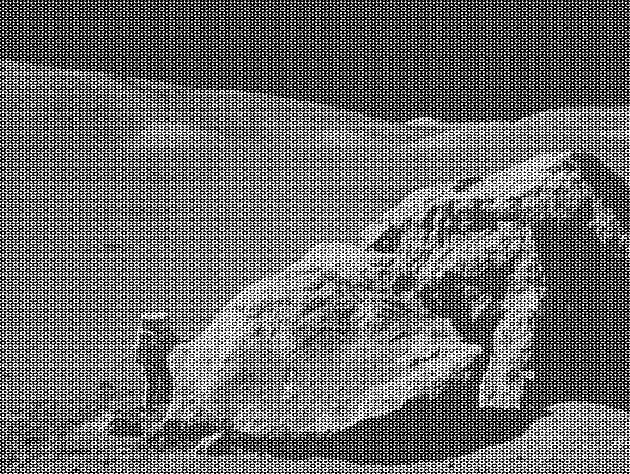

In [6]:
moon_img = Image.open('./moonlanding.png')
moon_img

In [8]:
moon_img_data = np.fromstring(moon_img.tobytes(),np.int8)
display(moon_img_data.shape,moon_img_data[:100])

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


(298620,)

array([  12,    0,   61,  119,    0,    0, -126,   38,    0,   36, -124,
          0,    0,  118,   65,    0,    9, -117,    1,    0,  100,   88,
          0,    0, -115,    0,    0,   79,  108,    0,    0, -119,   21,
          0,   54,  124,    0,    0, -128,   47,    0,   29, -120,    0,
          0,  114,   73,    0,    2, -116,    0,    0,   94,   94,    0,
          0, -116,    1,    0,   72,  113,    0,    0, -121,   28,    0,
         47, -128,    0,    0,  124,   54,    0,   19, -121,    0,    0,
        106,   77,    0,    0, -115,    0,    0,   88,  101,    0,    0,
       -120,    5,    0,   63,  115,    0,    0, -128,   35,    0,   38,
       -126], dtype=int8)

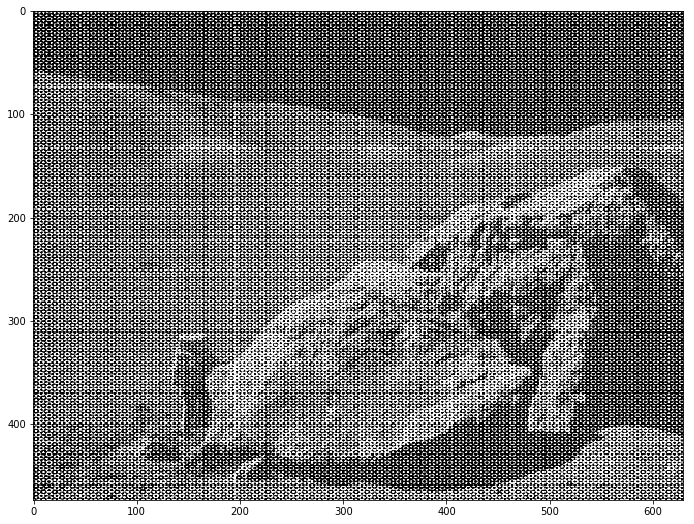

In [13]:
plt.figure(figsize=(12,9))
plt.imshow(moon, cmap='gray')

In [14]:
# 使用scipy中的快速傅里叶变换，对图片进行转换----->频域
moon_fft2 = fft2(moon)
moon_fft2

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

In [15]:
# 将比较大的频过滤掉，也就是过滤掉图片变换较大的地方
cond = np.abs(moon_fft2) > 1e3
moon_fft2[cond] = 0

In [16]:
moon_result = ifft2(moon_fft2)
moon_result

array([[-0.2826645 +2.90816127e-19j,  0.08010893-6.66283329e-17j,
        -0.21303105-9.26850831e-18j, ..., -0.03895291-5.42202664e-17j,
        -0.18217105+1.07222691e-17j, -0.17954478+2.02531666e-17j],
       [-0.00702763-1.44727666e-18j,  0.06715892-4.21842426e-17j,
        -0.09148968+1.21650566e-17j, ..., -0.1856927 +3.67771978e-17j,
        -0.19348538+1.01028359e-16j, -0.15636131+7.81588535e-17j],
       [-0.03724453-3.29574295e-18j, -0.12469123+2.02126976e-17j,
        -0.10263439-1.83076121e-18j, ..., -0.18584874+4.87630383e-17j,
        -0.19098356+5.02036229e-17j,  0.08034539-1.58071078e-16j],
       ...,
       [ 0.07167082-1.52090572e-17j, -0.04644684+5.02307547e-19j,
        -0.07860907+2.72428576e-17j, ...,  0.09754767-4.69640263e-17j,
         0.02351329+5.22318930e-17j,  0.18534262-1.57605210e-16j],
       [ 0.00943622+1.79027031e-17j, -0.06645724+3.58021901e-17j,
        -0.02696014+3.94854798e-17j, ...,  0.05524265+2.55465815e-17j,
        -0.00268553+5.52961306e-17j

In [17]:
result = np.real(moon_result)

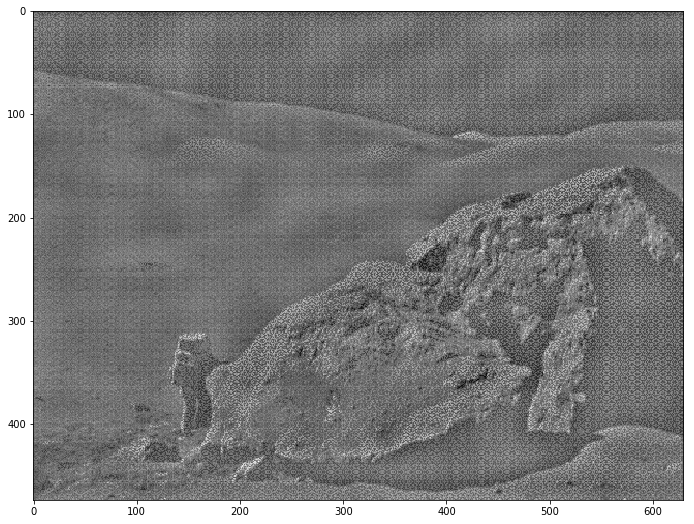

In [20]:
plt.figure(figsize = (12,9))
plt.imshow(result,cmap='gray')